### Importing the libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
elecVehicles=pd.read_csv('Electric_Vehicle_Population_Data.csv')
elecVehicles.head(20)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900
7,1N4AZ0CP0D,Snohomish,Mukilteo,WA,98275,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,21.0,176817364,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,53061042001
8,1N4BZ0CP4G,Island,Clinton,WA,98236,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,10.0,475900379,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,53029972100
9,KNDJP3AE2G,Skagit,Anacortes,WA,98221,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,40.0,100489049,POINT (-122.61214 48.51748),PUGET SOUND ENERGY INC,53057940301


In [11]:
elecVehicles.shape

(112634, 17)

In [12]:
def checkNulls(dataSetName):
    import pandas as pd
    print(dataSetName.isna().sum())
checkNulls(elecVehicles)

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64


### Handling missing values

- Since, vehicle model is a categorical value and only 20 values are missing, we can impute the missing values with the mode value of the model.

In [13]:
nullModel = elecVehicles[elecVehicles['Make']=='VOLVO']
modelMode = nullModel['Model'].mode()
modelMode


0    XC90
Name: Model, dtype: object

In [14]:
elecVehicles['Model'].fillna('XC90',inplace=True)

In [15]:
elecVehicles.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [16]:
vehicleLocationMode = elecVehicles['Vehicle Location'].mode()
vehicleLocationMode

0    POINT (-122.13158 47.67858)
Name: Vehicle Location, dtype: object

### Applying the same logic here for imputation

In [17]:
elecVehicles['Vehicle Location'].fillna(str(vehicleLocationMode),inplace=True)
checkNulls(elecVehicles)

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64


In [18]:
nullElectricUtility = elecVehicles[elecVehicles['Electric Utility'].isna()]
nullElectricUtility['City'].nunique()

222

<AxesSubplot: >

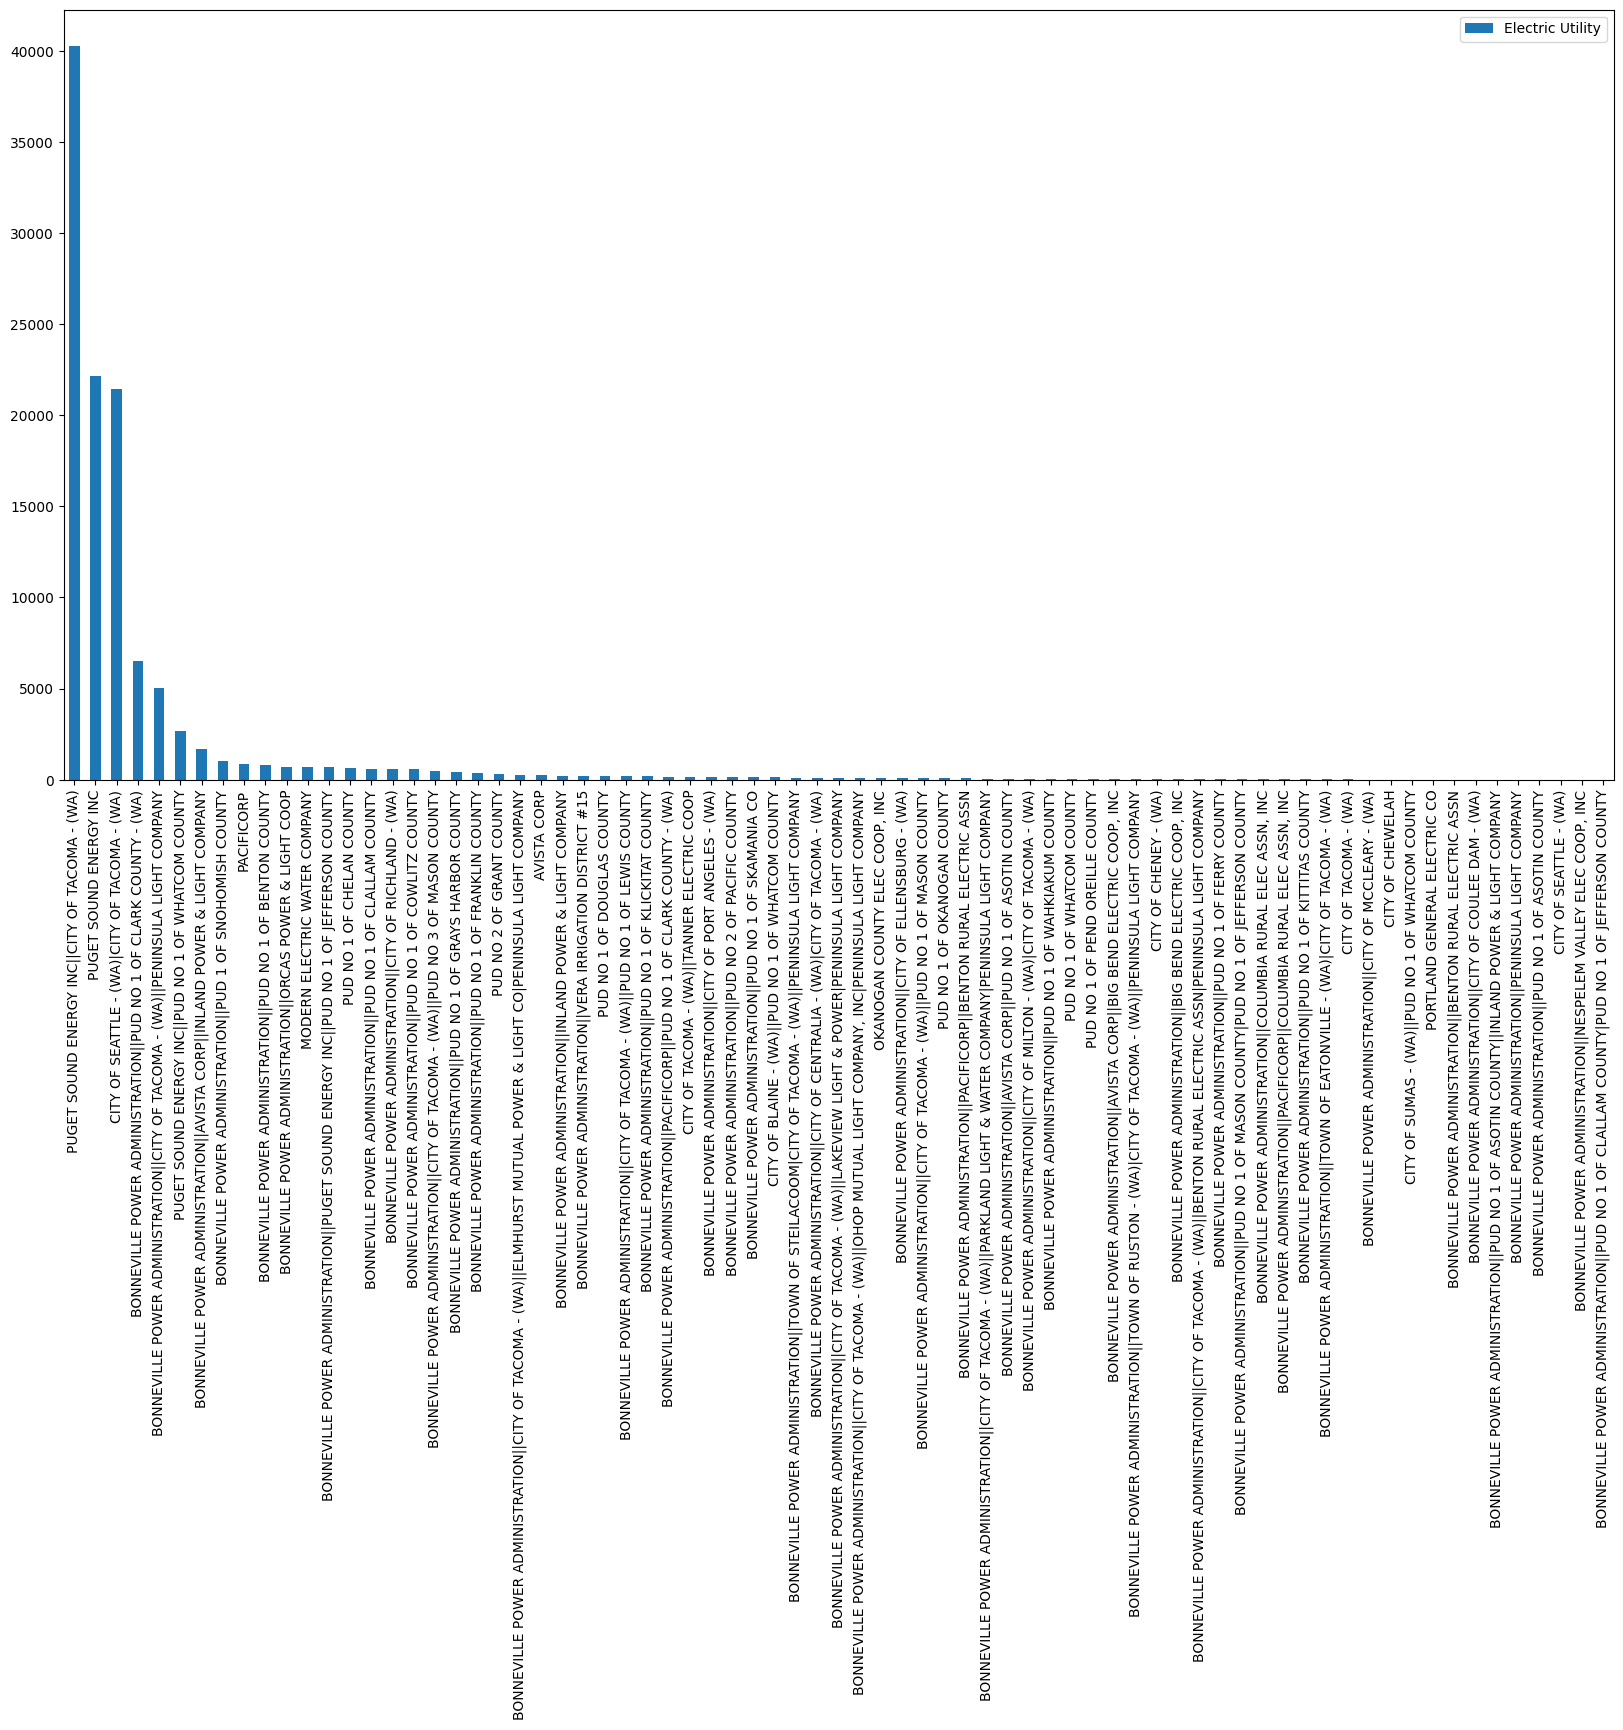

In [19]:
pd.DataFrame(elecVehicles['Electric Utility'].value_counts()).plot(kind='bar',figsize=(20,10))

In [20]:
elecVehicles['Electric Utility'].mode()

0    PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
Name: Electric Utility, dtype: object

### We are plotting a kde plot of electric utility where value of electric utility is 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)' and similarly we are plotting where electric utility is null

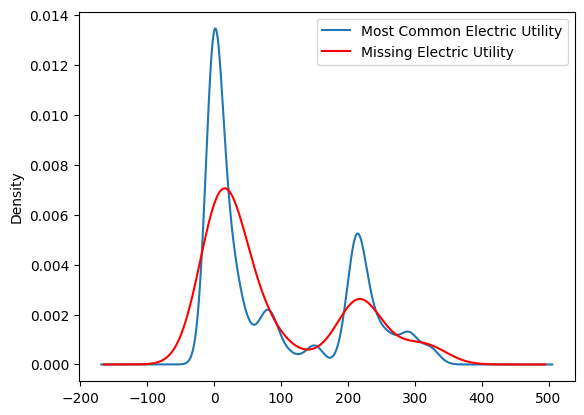

In [21]:
def performKdeComparison(df,xAxis,yAxis,valueToCompare, xLabel = "xLabel", yLabel ='yLabel' ):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    df[df[xAxis] == valueToCompare][yAxis].plot(kind='kde',ax=ax)
    df[df[xAxis].isnull()][yAxis].plot(kind='kde',ax=ax, color='red')
    lines,labels = ax.get_legend_handles_labels()
    labels = [xLabel,yLabel]
    ax.legend(lines,labels,loc='best')

performKdeComparison(elecVehicles, 'Electric Utility', 'Electric Range', 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)', 'Most Common Electric Utility', 'Missing Electric Utility')


### Now, we are imputing the missing values with the mode value (PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA))

In [22]:
temp=elecVehicles[elecVehicles['Electric Utility']=='PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)']['Electric Range']
elecVehicles['Electric Utility'].fillna('PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',inplace=True)


### Here, we are plotting the impact of the replacement of the missing values with the mode values. As you can see in the below graph, both the curves are overlapping, that means there has been no impact on the overall distribution of the data.

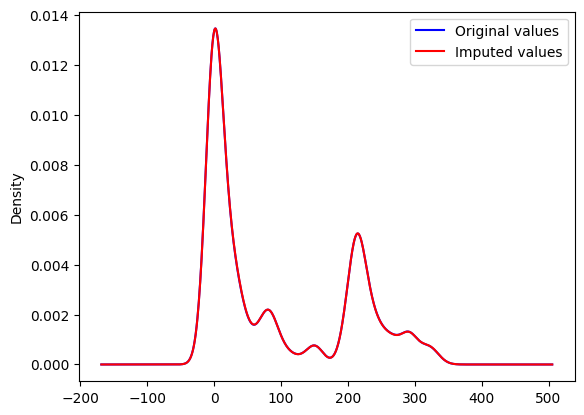

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',color='blue')
elecVehicles[elecVehicles['Electric Utility']=='PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)']['Electric Range'].plot(kind='kde',color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original values','Imputed values']
ax.legend(lines,labels,loc='best')

In [24]:
checkNulls(elecVehicles)

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64


### Now, imputing the missing values in Legislative District. Since, we cannot impute this column with the mode as it differs from state to state, we will impute it with 0

In [25]:
elecVehicles['Legislative District'].fillna(0,inplace=True)

In [26]:
checkNulls(elecVehicles)

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


### Top 5 vehicle makes throughout the years

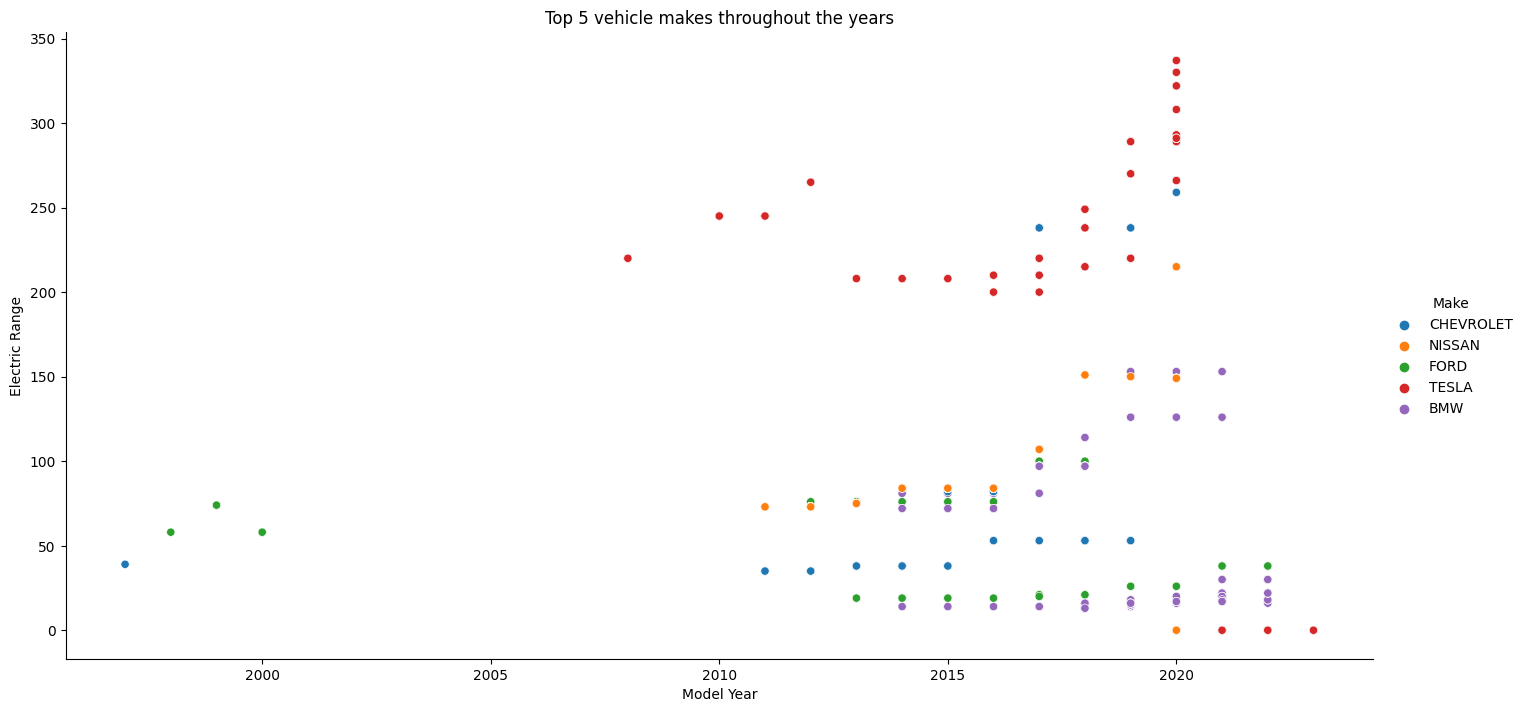

In [30]:
topVehicles=elecVehicles['Make'].value_counts().index.tolist()
topFiveVehicles=elecVehicles[elecVehicles['Make'].isin(topVehicles[:5])]
rel=sns.relplot(x='Model Year', y='Electric Range', hue='Make',kind='scatter',data=topFiveVehicles,color='red',height=7,aspect=2).set(title="Top 5 vehicle makes throughout the years")


### Adoption of EVs by State 

In [31]:
elecVehicles['State'].value_counts()

WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
FL         6
AZ         6
IL         6
SC         5
OR         5
NE         5
HI         4
UT         4
AR         4
NY         4
TN         3
KS         3
MO         3
PA         3
MA         3
LA         3
NJ         3
NH         2
OH         2
WY         2
ID         2
KY         1
RI         1
ME         1
MN         1
SD         1
WI         1
NM         1
AK         1
MS         1
AL         1
DE         1
OK         1
ND         1
Name: State, dtype: int64

### Comparison between models of Top 3 makes


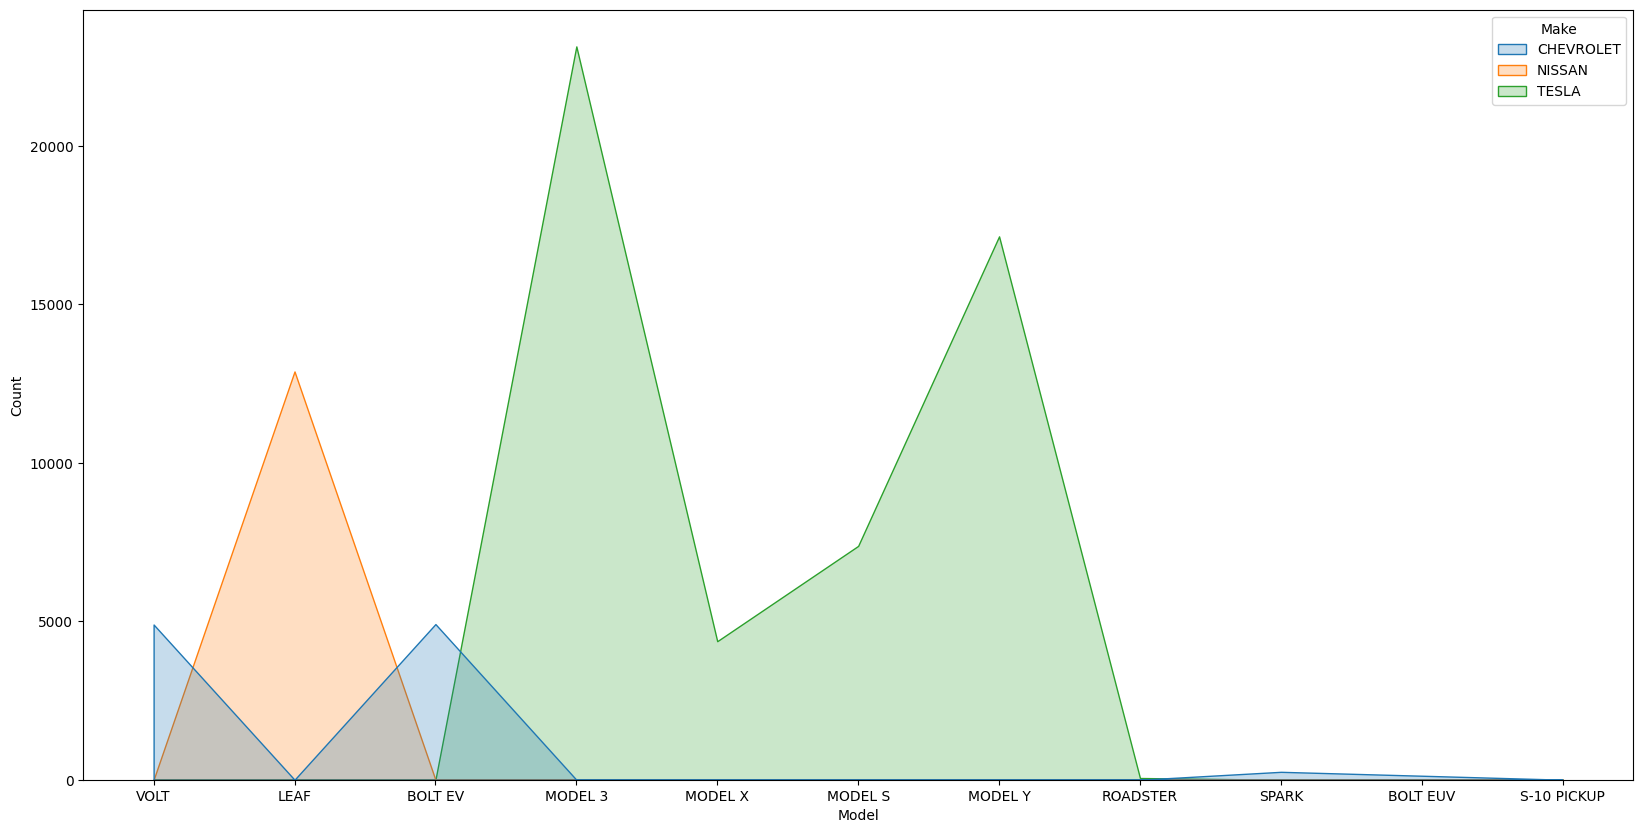

In [32]:
topThreeModel=elecVehicles['Make'].value_counts().index.tolist()
topThreeModel=elecVehicles[elecVehicles['Make'].isin(topThreeModel[:3])]

plt.figure(figsize=(20,10))
fig = sns.histplot(binwidth=1,
            x='Model',
            hue='Make',
            data=topThreeModel,
            stat="count",
            element = 'poly',
            color='red')

**From above, we can see that Tesla Model 3 is the most popular EV.**